In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

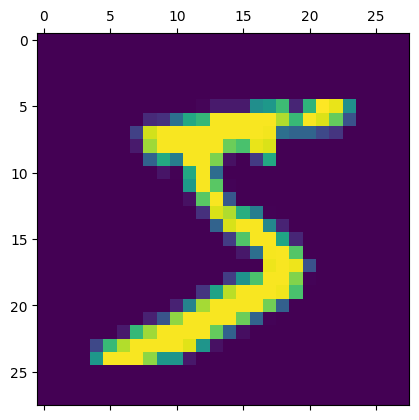

In [7]:
plt.matshow(x_train[0])
plt.show()

In [8]:
y_train[0]

5

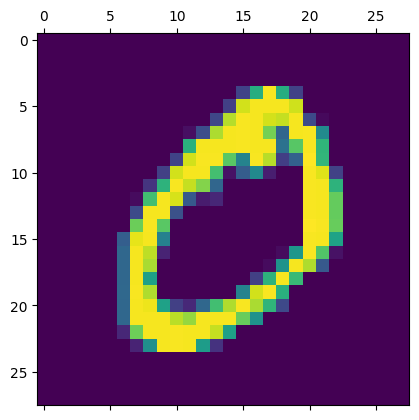

In [9]:
plt.matshow(x_train[1])
plt.show()

In [10]:
y_train[1]

0

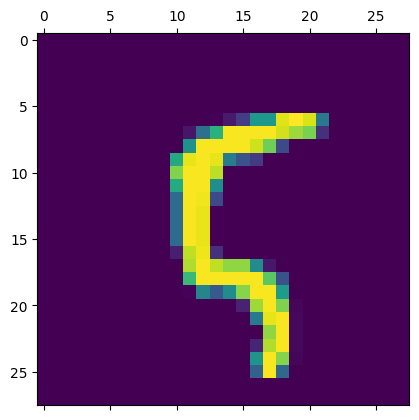

In [11]:
plt.matshow(x_train[100])
plt.show()

In [12]:
y_train[100]

5

In [13]:
# Transform 2D arrays into 1D array to fit into our neuron template
# Divide by 255 to scale our data into 0 to 1 scale. Often time scaling helps improve accuracy.
x_train_flattened = x_train.reshape(len(x_train), 28 * 28) / 255 
x_test_flattened = x_test.reshape(len(x_test), 28 * 28) / 255

In [14]:
# Define our model
model = keras.Sequential([ # A way to define a model as a linear stack of layers
    # keras.layers.Flattened(input_shape = (28, 28)), A built in function for flattening dimesions of array 
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid') #Output, shape of the input neurons, what activation method
                      ])
# Tweak our model setting
model.compile(optimizer = 'adam', # Optimizer is an argument for a method of optimization 
              loss = 'sparse_categorical_crossentropy', # Loss argument specify our error metric method to measure our model performance.
              metrics = ['accuracy']
             )
# Train our model
model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 1s 525us/step - loss: 0.4699 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 1s 476us/step - loss: 0.3035 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 1s 434us/step - loss: 0.2834 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 1s 430us/step - loss: 0.2731 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 1s 434us/step - loss: 0.2667 - accuracy: 0.9255


In [15]:
# Test our model
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 387us/step - loss: 0.2710 - accuracy: 0.9234


[0.2710365056991577, 0.9233999848365784]

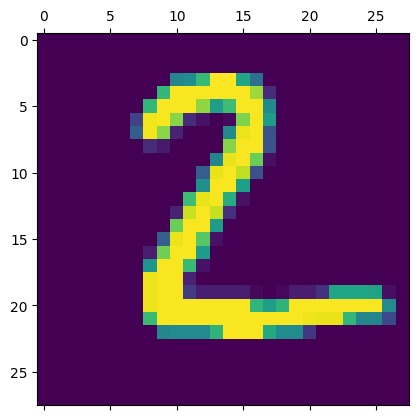

In [16]:
plt.matshow(x_test[1])
plt.show()

In [17]:
y_predicted = model.predict(x_test_flattened)
y_predicted[1] # return an array of 10 results resemblance score of image from 0-9. 

313/313 [==============================] - 0s 316us/step


array([4.4441211e-01, 4.8838481e-03, 9.9902964e-01, 3.2467183e-01,
       5.3756616e-10, 8.1676638e-01, 9.0565658e-01, 1.4840842e-12,
       1.6774587e-01, 1.7573211e-09], dtype=float32)

In [18]:
# Show number of largest rating
np.argmax(y_predicted[1])

2

In [31]:
# Create a confusion matrix of error
y_predicted_labels = [np.argmax(i) for i in y_predicted]
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

In [28]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 8.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


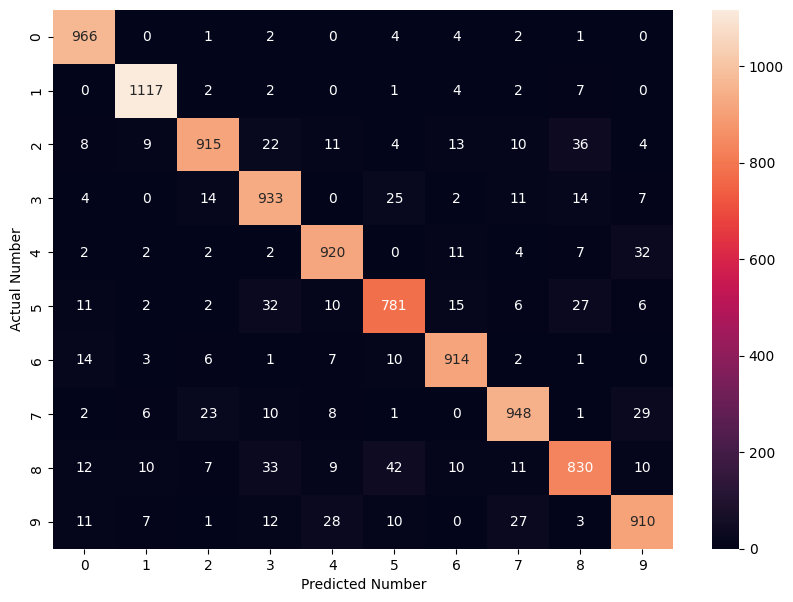

In [34]:
# Visualize error using heat map
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(confusion_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted Number')
plt.ylabel("Actual Number")
plt.show();

In [37]:
# Add hidden layers to our model
model = keras.Sequential([ # A way to define a model as a linear stack of layers
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid') #Output, shape of the input neurons, what activation method
                      ])
# Tweak our model setting
model.compile(optimizer = 'adam', # Optimizer is an argument for a method of optimization 
              loss = 'sparse_categorical_crossentropy', # Loss argument specify our error metric method to measure our model performance.
              metrics = ['accuracy']

             )
# Train our model
model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 899us/step - loss: 0.2691 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 2s 927us/step - loss: 0.1210 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 1s 779us/step - loss: 0.0845 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 1s 773us/step - loss: 0.0654 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 1s 739us/step - loss: 0.0517 - accuracy: 0.9843


In [38]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 475us/step - loss: 0.0785 - accuracy: 0.9766


[0.07850484549999237, 0.9765999913215637]

313/313 [==============================] - 0s 419us/step


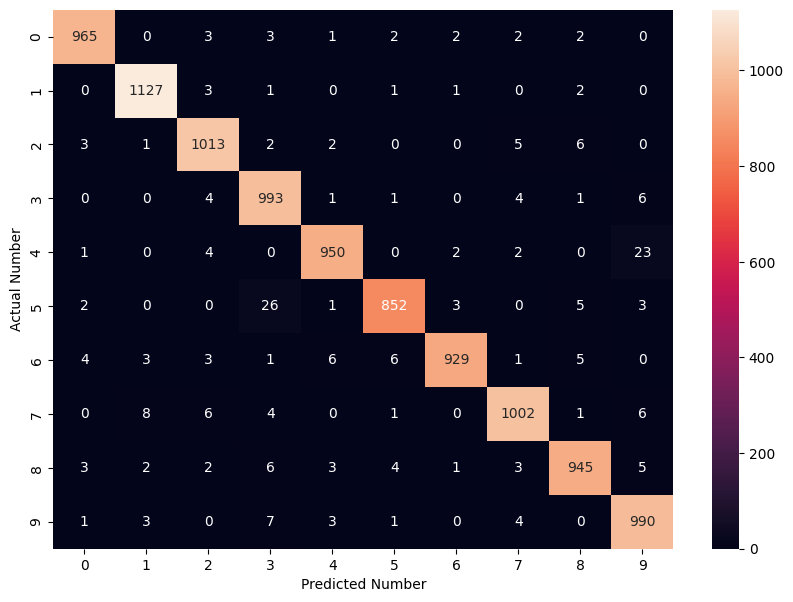

In [39]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize = (10, 7))
sn.heatmap(confusion_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted Number')
plt.ylabel("Actual Number")
plt.show();